In [ ]:
import numpy as np
from sklearn.preprocess import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assume that you have a dataset with daily closing prices for a stock stored in a NumPy array called data
# First, normalize the data using scaler
scaler = MinMaxScaler()
data = data / np.max(data)

# Define the number of timesteps (samples per sequence) and the number of outputs (one-hot encoded labels for target values)
timesteps = 60
outputs = 1
X, y = [], []
for i in range(len(data)-timesteps):
    X.append(data[i:(i+timesteps), None])
    y.append(data[i + timesteps])
X = np.array(X)
y = np.array(y)

# Reshape the data to fit Keras requirements
X = np.reshape(X, (X.shape[0], X.shape[1], X.shape[2]))
X = scaler.fit_transform(X)

# Build and compile the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(outputs))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model using the training data
model.fit(X, y, epochs=1, batch_size=32)


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [2]:
key="fd5ebaf5f52fc68df1e72fbd16beb1f8cbe8c7d8"

In [5]:
import yfinance as yf
ticker = yf.Ticker("AAPL")
price = ticker.history(period="1d")['Close']
balance_sheet = ticker.balance_sheet

In [11]:
import yfinance as yf

# Fetch historical data for a stock (e.g., Apple)
data = yf.download("TCS.NS", start="2001-01-01", end="2025-06-12")
print(data.head())


C:\Users\adity\AppData\Local\Temp\ipykernel_12208\2930131888.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("TCS.NS", start="2001-01-01", end="2025-06-12")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open  Volume
Ticker         TCS.NS     TCS.NS     TCS.NS     TCS.NS  TCS.NS
Date                                                          
2002-08-12  28.240953  28.454361  27.547377  27.547377  212976
2002-08-13  27.858589  28.730005  27.654075  28.276514  153576
2002-08-14  25.937918  27.920829  25.413288  27.920829  822776
2002-08-15  25.937918  25.937918  25.937918  25.937918       0
2002-08-16  25.875681  27.031639  25.431082  25.804546  811856


In [16]:
import pandas as pd

df = pd.read_csv("tcs_data.csv", skiprows=[1,2], index_col=0, parse_dates=True)
print(df.head())

                Close       High        Low       Open  Volume
Price                                                         
2002-08-12  28.240953  28.454361  27.547377  27.547377  212976
2002-08-13  27.858589  28.730005  27.654075  28.276514  153576
2002-08-14  25.937918  27.920829  25.413288  27.920829  822776
2002-08-15  25.937918  25.937918  25.937918  25.937918       0
2002-08-16  25.875681  27.031639  25.431082  25.804546  811856


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5667 entries, 2002-08-12 to 2025-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5667 non-null   float64
 1   High    5667 non-null   float64
 2   Low     5667 non-null   float64
 3   Open    5667 non-null   float64
 4   Volume  5667 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 265.6 KB


In [18]:
volume_with_zeros=df[df['Volume'] == 0]
print(volume_with_zeros)

                  Close         High          Low         Open  Volume
Price                                                                 
2002-08-15    25.937918    25.937918    25.937918    25.937918       0
2002-09-10    29.121260    29.121260    29.121260    29.121260       0
2002-10-02    26.151329    26.151329    26.151329    26.151329       0
2002-10-15    26.987179    26.987179    26.987179    26.987179       0
2002-11-06    26.204685    26.204685    26.204685    26.204685       0
...                 ...          ...          ...          ...     ...
2009-04-30   117.281441   117.281441   117.281441   117.281441       0
2009-10-13   221.396973   221.396973   221.396973   221.396973       0
2014-04-24   895.885315   895.885315   895.885315   895.885315       0
2014-10-15  1104.944580  1104.944580  1104.944580  1104.944580       0
2025-03-18  3466.885010  3466.885010  3466.885010  3466.885010       0

[311 rows x 5 columns]


In [20]:
df = df[df['Volume'] != 0]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5356 entries, 2002-08-12 to 2025-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   5356 non-null   float64
 1   High    5356 non-null   float64
 2   Low     5356 non-null   float64
 3   Open    5356 non-null   float64
 4   Volume  5356 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 251.1 KB


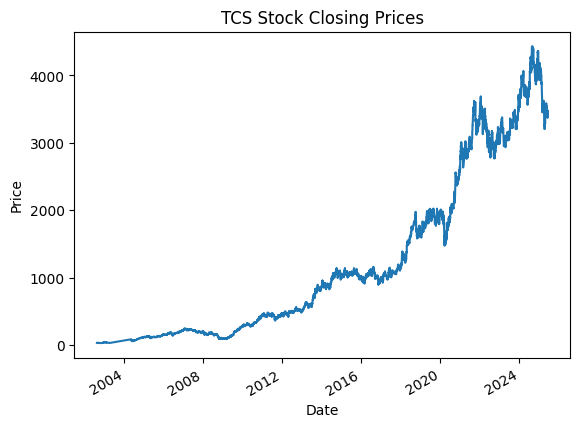

In [22]:
import matplotlib.pyplot as plt

df['Close'].plot()
plt.title('TCS Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

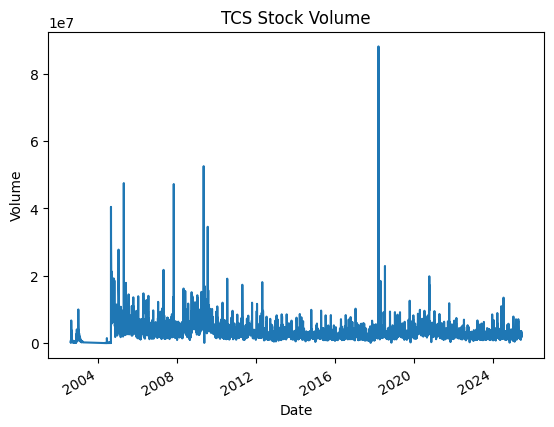

In [ ]:
df['Volume'].plot()
plt.title('TCS Stock Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

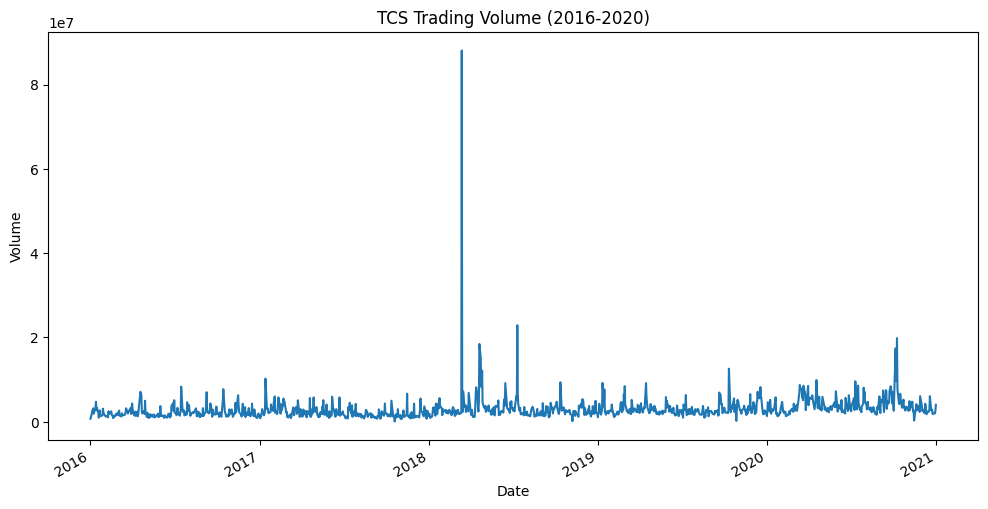

In [24]:
import matplotlib.pyplot as plt

# Filter the DataFrame for dates between 2016 and 2020
volume_2016_2020 = df.loc['2016':'2020', 'Volume']

# Plot the volume
plt.figure(figsize=(12, 6))
volume_2016_2020.plot()
plt.title('TCS Trading Volume (2016-2020)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [25]:
max_volume_date = df['Volume'].idxmax()
max_volume = df['Volume'].max()
print(f"Most volume was traded on {max_volume_date} with {max_volume} shares.")

Most volume was traded on 2018-03-13 00:00:00 with 88067154 shares.


In [26]:
df[df['Volume'] == max_volume]

,Close,High,Low,Open,Volume
Price,,,,,
2018-03-13,1251.640259,1274.576259,1245.223348,1268.159349,88067154


In [27]:
df.describe()

,Close,High,Low,Open,Volume
count,5356.000000,5356.000000,5356.000000,5356.000000,5.356000e+03
mean,1262.157816,1275.411116,1249.299130,1262.651703,3.340512e+06
std,1225.560109,1236.696418,1214.961866,1225.917098,3.061711e+06
min,25.235456,25.929035,23.101372,23.101372,4.560000e+03
25%,212.036125,215.633820,209.068853,212.690394,1.774208e+06
50%,940.747955,952.025760,925.107262,939.422788,2.591592e+06
75%,1915.598846,1938.432013,1888.845810,1915.919817,4.004204e+06
max,4431.997070,4469.467702,4391.362570,4453.651401,8.806715e+07


In [28]:
df.to_csv("tcs_data_cleaned.csv")
import pandas as pd
# Load the cleaned data
df = pd.read_csv("tcs_data_cleaned.csv", index_col=0, parse_dates=True)

df.head()

,Close,High,Low,Open,Volume
Price,,,,,
2002-08-12,28.240953,28.454361,27.547377,27.547377,212976
2002-08-13,27.858589,28.730005,27.654075,28.276514,153576
2002-08-14,25.937918,27.920829,25.413288,27.920829,822776
2002-08-16,25.875681,27.031639,25.431082,25.804546,811856
2002-08-19,25.235456,26.089088,24.995374,26.089088,205880
